In [2]:
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
import numpy as np
from scipy.linalg import svd
from tabulate import tabulate

from timeit import default_timer as timer

# 1. MNIST

In [2]:
f_pickle = "mnist_32.bnch"
f = gzip.open(f_pickle, mode='rb')
bnch = pickle.load(f)
f.close()

In [3]:
print(bnch.keys())

dict_keys(['DESCR', 'data', 'target', 'data_test', 'target_test'])


In [4]:
print(bnch['DESCR'])

MNIST data set from Lecun site: http://yann.lecun.com/exdb/mnist/


In [5]:
print(bnch['data'].shape)

(60000, 32, 32, 1)


In [6]:
print(bnch['target'].shape)

(60000,)


In [7]:
SAMPLE = 9

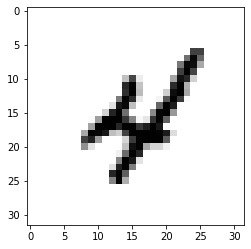

4


In [8]:
# pick a sample to plot
sample = SAMPLE
image = bnch['data'][sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print(bnch['target'][sample])

# 2. Análisis en EOLO

In [11]:
## Leemos los datos del fichero y aplicamos transformaciones
f_pickle = "mnist_32.bnch"
f = gzip.open(f_pickle, mode='rb')
bnch = pickle.load(f)
f.close()
data = bnch['data']
N = data.shape[0]
M = data.shape[1]
data = np.array(data).reshape(N, M*M)
target = bnch['target']

In [12]:
## Calculamos SVD de nuestra BBDD.
U, s, VT = svd(data)

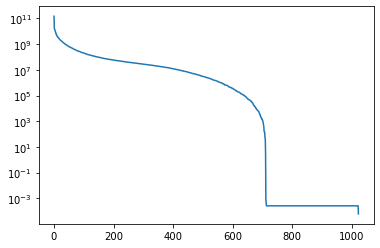

In [13]:
# Plot de los Autovalores
plt.yscale("log")
plt.plot((s*s))

In [14]:
# FUENTE: https://en.wikipedia.org/wiki/Principal_component_analysis#Compute_the_cumulative_energy_content_for_each_eigenvector

## NFEAT indicadas para hacer DIM-REDUCTION
NFEAT = 40 # Un 40 % de la varianza total.

n_row, n_col = 5, 8
n_components = n_row * n_col
image_shape = (32, 32)

Total = sum(s)
for i in range(2, 51, 2):
    if (i == NFEAT):
        print("Tomamos %d componentes" % (i) + " y nos queda un %2.2f" % (100*(sum(s[:i])/Total)) +  " % de la varianza total" + " <--------- ELEGIDA ")
    else:
        print("Tomamos %d componentes" % (i) + " y nos queda un %2.2f" % (100*(sum(s[:i])/Total)) +  " % de la varianza total")
    
print("\n-------------Muchas Componentes-------------\n")
    
for i in range(100, 1000, 100):
    print("Tomamos %d componentes" % (i) + " y nos queda un %2.2f" % (100*(sum(s[:i])/Total)) +  " % de la varianza total")
    

Tomamos 2 componentes y nos queda un 8.19 % de la varianza total
Tomamos 4 componentes y nos queda un 11.88 % de la varianza total
Tomamos 6 componentes y nos queda un 15.03 % de la varianza total
Tomamos 8 componentes y nos queda un 17.62 % de la varianza total
Tomamos 10 componentes y nos queda un 19.95 % de la varianza total
Tomamos 12 componentes y nos queda un 22.03 % de la varianza total
Tomamos 14 componentes y nos queda un 23.91 % de la varianza total
Tomamos 16 componentes y nos queda un 25.69 % de la varianza total
Tomamos 18 componentes y nos queda un 27.35 % de la varianza total
Tomamos 20 componentes y nos queda un 28.91 % de la varianza total
Tomamos 22 componentes y nos queda un 30.37 % de la varianza total
Tomamos 24 componentes y nos queda un 31.76 % de la varianza total
Tomamos 26 componentes y nos queda un 33.10 % de la varianza total
Tomamos 28 componentes y nos queda un 34.38 % de la varianza total
Tomamos 30 componentes y nos queda un 35.60 % de la varianza total


Automatically created module for IPython interactive environment
(60000, 1024)
Dataset consists of 60000 numbers
Extracting the top 40 PCA using randomized SVD...
[738.71187204 338.68527    962.21611481 764.91943575 709.79282429
 804.80238014 771.23987147 657.12132139 851.37363817 624.82943792]
722.3692165979558
done in 2.742s
Extracting the top 40 Non-negative components - NMF...
[1028.98283019  519.31688722 1275.30563922 1069.49922052  957.096655
 1112.70740961 1098.3028266   907.0108844  1140.62872138  847.78153606]
995.6632610192066
done in 30.828s
Extracting the top 40 Independent components - FastICA...
[738.80097075 338.63423927 962.4234871  764.70942774 709.72806089
 805.21568728 770.92853225 656.98615221 851.26902099 624.61716741]
722.3312745880104
done in 12.698s


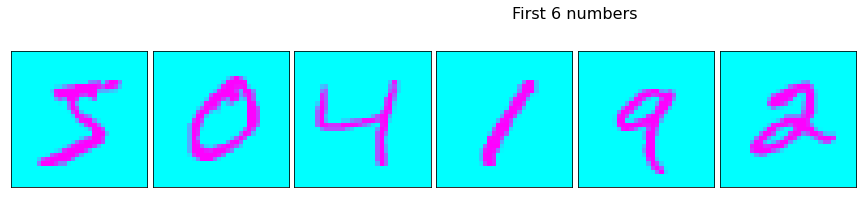

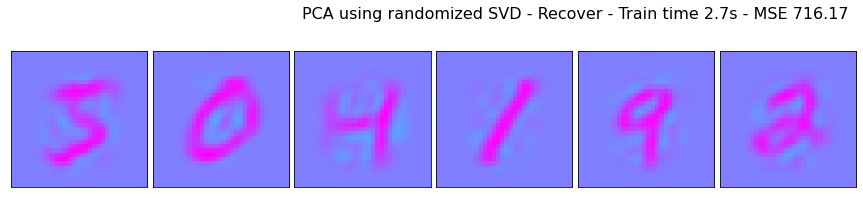

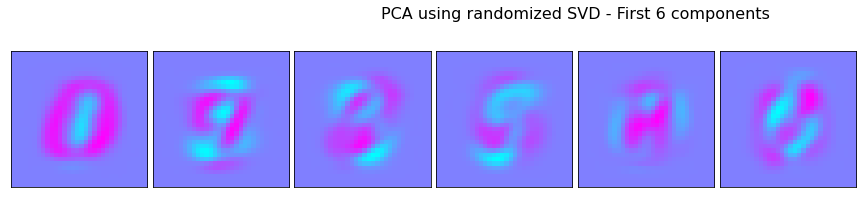

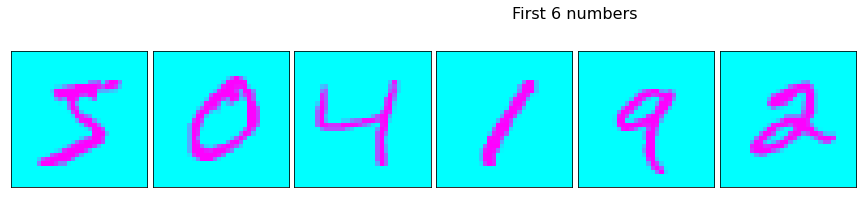

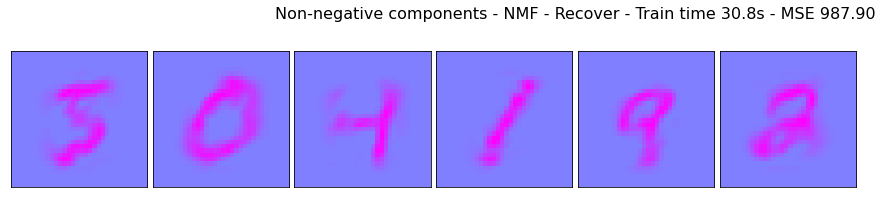

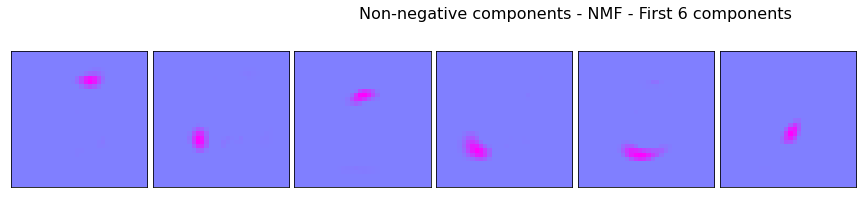

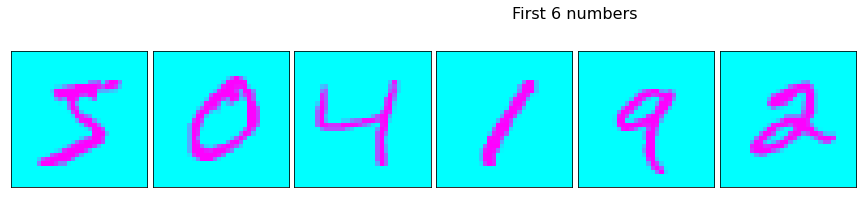

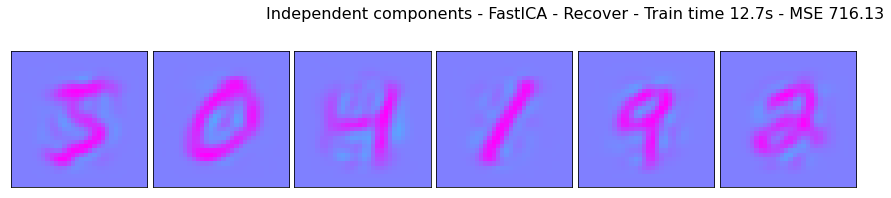

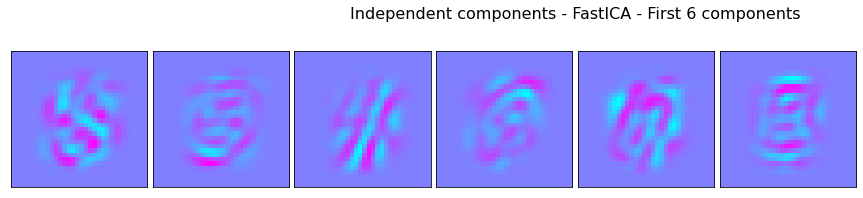

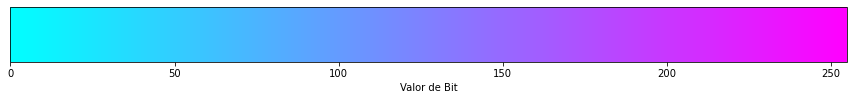

In [26]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
import matplotlib as mpl

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

rng = RandomState(0)

f_pickle = "mnist_32.bnch"
f = gzip.open(f_pickle, mode='rb')
bnch = pickle.load(f)
f.close()
data = bnch['data']
data = np.array(data).reshape(N, M*M)

n_samples, n_features = data.shape
print(data.shape)



print("Dataset consists of %d numbers" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=mpl.cm.cool):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components,  init='random', random_state=0,  tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),
]

# #############################################################################
# Plot a sample of the input data
nplot = 6

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    if center:
        data = data
    estimator.fit(data)
    train_time = (time() - t0)
    data_transform = estimator.transform(data)
    recover = estimator.inverse_transform(data_transform)
    error = mean_squared_error(data, recover)
    errorn = number_error(recover, data)
    print(errorn)
    print(np.mean(errorn))
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)

    plot_gallery("First 6 numbers", data[:nplot])
    
    plot_gallery('%s - Recover - Train time %.1fs - MSE %.2f' % (name, train_time, error),
                 recover[:nplot])
    
    plot_gallery('%s - First 6 components' % (name),
                 components_[:nplot])
    
    

fig, ax = plt.subplots(figsize=(15, 2))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Valor de Bit')

plt.show()

## Análisis por Clases

In [24]:
def number_error(data, recover):
    error = np.zeros((10))
    unique, counts = np.unique(target, return_counts=True)
    LL = {}
    RR = {}
    for i in range(10):
        L = np.ndarray((counts[i], M*M))
        R = np.ndarray((counts[i], M*M))
        k = 0
        j = 0
        for val in target:
            if (val == i):
                L[k][:] = data[j][:]
                R[k][:] = recover[j][:]
                k += 1
            j += 1
        error[i] = mean_squared_error(L, R)
    return error


In [8]:
table = [[],[],[],[],[],[]]
for i in range(10):
    table[0].append(i)
    data = LL[str(i)]
    data = data.reshape(counts[i], M*M)
    U, s, VT = svd(data)
    Total = sum(s)
    var = 100*(sum(s[:NFEAT])/Total)
    table[1].append("%.2f"% var + "%")
    
    start = timer()
    pca = PCA(n_components=NFEAT)
    reduced_data = pca.fit_transform(data)
    recoverPCA = pca.inverse_transform(reduced_data)
    errorPCA = mean_squared_error(data, recoverPCA)
    end = timer()
    
    errorPCA = mean_squared_error(data, recoverPCA)
    table[2].append(errorPCA)
    table[4].append("%.2f" % (end - start) + " s")
    
    start = timer()
    transformer = FastICA(n_components=NFEAT, random_state=0, max_iter = 1000)
    reduced_data = transformer.fit_transform(data)
    recoverICA = transformer.inverse_transform(reduced_data)
    end = timer()
    
    errorICA = mean_squared_error(data, recoverICA)
    table[3].append(errorICA)   
    table[5].append("%.2f" % (end - start) + " s")

/home/josem.chacon/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/josem.chacon/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/josem.chacon/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/josem.chacon/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or

In [9]:
table = zip(*table)  
print("----------------------------------------------------------")
print("\nESTUDIO CON NFEAT = 40 (ORIGINALES = 32*32 = 1024)\n")
print("----------------------------------------------------------")
print(tabulate(table, headers=["Numero", "Var", "ECM-PCA", "ECM-ICA", "TIME-PCA", "TIME-ICA"], tablefmt="grid"))

----------------------------------------------------------

ESTUDIO CON NFEAT = 40 (ORIGINALES = 32*32 = 1024)

----------------------------------------------------------
+----------+--------+-----------+-----------+------------+------------+
|   Numero | Var    |   ECM-PCA |   ECM-ICA | TIME-PCA   | TIME-ICA   |
+==========+========+===========+===========+============+============+
|        0 | 47.77% |   455.962 |   455.953 | 0.43 s     | 3.37 s     |
+----------+--------+-----------+-----------+------------+------------+
|        1 | 54.41% |   128.179 |   128.165 | 0.51 s     | 3.60 s     |
+----------+--------+-----------+-----------+------------+------------+
|        2 | 43.46% |   635.61  |   635.542 | 0.47 s     | 14.57 s    |
+----------+--------+-----------+-----------+------------+------------+
|        3 | 44.21% |   552.98  |   552.943 | 0.39 s     | 7.77 s     |
+----------+--------+-----------+-----------+------------+------------+
|        4 | 44.64% |   464.209 |   4